In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


import recon
model = recon.recon.Recon()
util = recon.utilities.Utilities()

import pyreporter as pr
import itertools
# import random

# import os
# import pickle as pkl

# from pydeseq2.dds import DeseqDataSet
# from pydeseq2.ds import DeseqStats
# from pydeseq2.utils import load_example_data

In [3]:
cmodel = model.add_gene_to_rxn(cobra_model=model.model, rxn_id='NADtm', gene_number='6398.1')
rxn = cmodel.reactions.get_by_id('NADtm')
rxn.reaction = 'nad[c] -> nad[m]'
# rxn.reversibility
rxn.knock_out()
rxn

Reaction identifier,NADtm
Name,Transport of NAD into Mitochondria
Memory address,0x7f7d9877fc70
Stoichiometry,nad[c] --> nad[m] [] --> []
GPR,6398.1
Lower bound,0
Upper bound,0


### Additional

In [11]:
prot = pd.read_csv('../data/NAD_cell_lines/230704_proteome_DDA_five_of_five.csv', sep=',', index_col=0)
prot1 = util.map_gene(prot, g_mapping=model.genes, mapping_column='uniprot_gname')
print(f'Mapped number of proteins: {len(prot1.index.unique())}/{len(prot.index.unique())}')
print(f'Number of groups: {prot1.sample_group.unique()}')
print(f'Number of replicates per group: {len(prot1.replicate.unique())}')
prot1.head()

Mapped number of proteins: 716/3830
Number of groups: ['CTRL' 'SLC25A51.KO' 'SLC25A51.OE']
Number of replicates per group: 5


,Sample,Abundance,ID,replicate,sample_group,norm_int
Accession,,,,,,
2194.1,Abundances.Normalized.F1.Sample.CTRL.1,1.042766e+11,CTRL_1,1,CTRL,36.601624
5591.1,Abundances.Normalized.F1.Sample.CTRL.1,2.769426e+10,CTRL_1,1,CTRL,34.688868
2597.1,Abundances.Normalized.F1.Sample.CTRL.1,2.664851e+11,CTRL_1,1,CTRL,37.955264
5315.1,Abundances.Normalized.F1.Sample.CTRL.1,1.678042e+11,CTRL_1,1,CTRL,37.287988
7317.1,Abundances.Normalized.F1.Sample.CTRL.1,4.923716e+10,CTRL_1,1,CTRL,35.519028


In [12]:
wt = prot1[prot1.sample_group == 'CTRL']
ko = prot1[prot1.sample_group == 'SLC25A51.KO']
oe = prot1[prot1.sample_group == 'SLC25A51.OE']

wt = wt.pivot_table(values='norm_int', index=wt.index, columns='replicate')
wt.columns = ['wt1', 'wt2', 'wt3', 'wt4', 'wt5']
ko = ko.pivot_table(values='norm_int', index=ko.index, columns='replicate')
ko.columns = ['ko1', 'ko2', 'ko3', 'ko4', 'ko5']
oe = oe.pivot_table(values='norm_int', index=oe.index, columns='replicate')
oe.columns = ['oe1', 'oe2', 'oe3', 'oe4', 'oe5']

In [13]:
def diff_exp(ko, wt):
    df = pd.DataFrame()
    for i in itertools.product(ko.columns, wt.columns):
        df[i[0]+'_'+i[1]] = ko[i[0]].div(wt[i[1]], axis=0)
    df['base'] = 1.0
    return df

In [14]:
protko = diff_exp(ko, wt)
protoe = diff_exp(oe, wt)

In [ ]:
# pko_rko = pd.concat((protko.mean(axis=1), df_ko[~df_ko.index.isin(protko.index)].mean(axis=1)))
# pko_rko = pko_rko.to_frame()
# pko_rko.columns = ['ko']
# pko_rko['base'] = 1.0
# pko_rko.to_csv('../data/NAD_cell_lines/protko_rnako.csv', sep='\t')

In [ ]:
# res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=pko_rko['ko'],
#                                      mapped_genes_comparison=pko_rko['base'], gene_fill=1.0)
# res = res.to_frame()
# res.columns = ['pko_rko']
# res.to_csv('../data/NAD_cell_lines/pr_pko_rko.csv', sep='\t')

In [ ]:
# poe_roe = pd.concat((protoe.mean(axis=1), df_oe[~df_oe.index.isin(protko.index)].mean(axis=1)))
# poe_roe = poe_roe.to_frame()
# poe_roe.columns = ['oe']
# poe_roe['base'] = 1.0
# poe_roe.to_csv('../data/NAD_cell_lines/protoe_rnaoe.csv', sep='\t')

In [ ]:
# res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=poe_roe['oe'],
#                                      mapped_genes_comparison=poe_roe['base'], gene_fill=1.0)
# res = res.to_frame()
# res.columns = ['poe_roe']
# res.to_csv('../data/NAD_cell_lines/pr_poe_roe.csv', sep='\t')

In [ ]:
# _r1 = rna1[rna1.columns[rna1.columns.str.contains('wtHEK293|HEK25a51|HEK25A51')]]
# _r1[(_r1 != 0.0).all(axis=1)]

<Axes: ylabel='Density'>

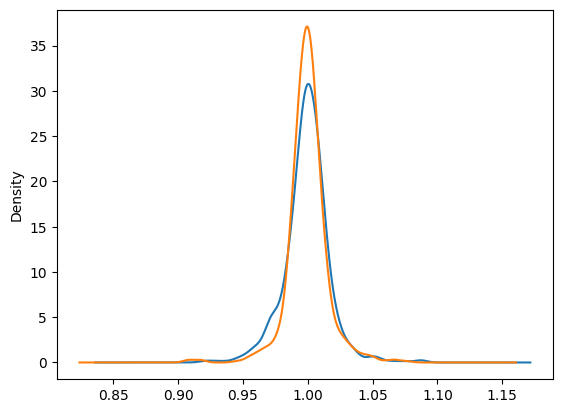

In [17]:
protoe.drop('base', axis=1).mean(axis=1).plot(kind='kde')
protko.drop('base', axis=1).mean(axis=1).plot(kind='kde')

In [18]:
_df_oe = protoe.T
_df_oe.loc[_df_oe.index == 'base', '6398.1'] = 1.0
_df_oe.loc[_df_oe.index != 'base', '6398.1'] = 1.2
protoe = _df_oe.T

In [19]:
protoe

,oe1_wt1,oe1_wt2,oe1_wt3,oe1_wt4,oe1_wt5,oe2_wt1,oe2_wt2,oe2_wt3,oe2_wt4,oe2_wt5,...,oe4_wt2,oe4_wt3,oe4_wt4,oe4_wt5,oe5_wt1,oe5_wt2,oe5_wt3,oe5_wt4,oe5_wt5,base
Accession,,,,,,,,,,,,,,,,,,,,,
10005.2,0.926527,0.955448,0.953240,0.923757,0.927845,0.955608,0.985437,0.983160,0.952752,0.956967,...,0.974333,0.972081,0.942016,0.946184,1.007962,1.039425,1.037023,1.004949,1.009395,1.0
10026.1,0.965357,1.076110,1.162710,0.973910,1.043101,0.973133,1.084779,1.172077,0.981755,1.051504,...,1.046397,1.130606,0.947019,1.014299,0.911492,1.016066,1.097834,0.919568,0.984898,1.0
10038.1,1.000926,0.985367,1.006007,1.012396,0.984298,1.128819,1.111273,1.134550,1.141755,1.110067,...,1.032736,1.054367,1.061063,1.031615,1.019549,1.003701,1.024724,1.031232,1.002612,1.0
10056.1,1.005368,1.004785,1.004749,1.007266,1.004527,1.009016,1.008431,1.008395,1.010920,1.008172,...,1.008683,1.008647,1.011173,1.008424,1.004692,1.004109,1.004073,1.006588,1.003851,1.0
10130.1,0.995533,0.996642,0.996615,0.996824,0.999123,0.996649,0.997760,0.997732,0.997942,1.000243,...,0.995987,0.995960,0.996169,0.998467,0.992872,0.993978,0.993951,0.994160,0.996453,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789.1,0.969462,0.975802,0.982729,0.982894,0.973744,0.977231,0.983622,0.990604,0.990770,0.981547,...,0.991164,0.998200,0.998367,0.989073,0.983347,0.989778,0.996804,0.996971,0.987690,1.0
9867.1,0.986793,0.984137,0.977448,0.970494,0.989201,1.011409,1.008687,1.001831,0.994703,1.013877,...,0.987201,0.980491,0.973515,0.992281,0.999358,0.996668,0.989894,0.982851,1.001797,1.0
9958.1,1.033672,1.021513,0.990544,0.989139,1.022041,1.017528,1.005558,0.975073,0.973690,1.006078,...,1.028549,0.997367,0.995953,1.029081,1.009904,0.998024,0.967768,0.966395,0.998540,1.0


In [20]:
res = pd.DataFrame()
columns = protoe.columns.difference(['base'])
for col in columns:
    _res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=protoe['base'],
                                          mapped_genes_comparison=protoe[col], gene_fill=1.0)
    res[col] = _res
res.to_csv('../data/NAD_cell_lines/pr_prot_slc25a51oe_wt.csv', sep='\t')

## Prediction (based on proteomics): SLC25A51ko 

In [21]:
_df_ko = protko.T
_df_ko.loc[_df_ko.index == 'base', '6398.1'] = 1.0
_df_ko.loc[_df_ko.index != 'base', '6398.1'] = 0.0
protko = _df_ko.T

In [22]:
protko

,ko1_wt1,ko1_wt2,ko1_wt3,ko1_wt4,ko1_wt5,ko2_wt1,ko2_wt2,ko2_wt3,ko2_wt4,ko2_wt5,...,ko4_wt2,ko4_wt3,ko4_wt4,ko4_wt5,ko5_wt1,ko5_wt2,ko5_wt3,ko5_wt4,ko5_wt5,base
Accession,,,,,,,,,,,,,,,,,,,,,
10005.2,0.952576,0.982311,0.980041,0.949729,0.953932,1.016546,1.048277,1.045855,1.013507,1.017992,...,1.016185,1.013837,0.982480,0.986827,1.017913,1.049686,1.047261,1.014870,1.019361,1.0
10026.1,0.934727,1.041967,1.125819,0.943009,1.010005,0.961727,1.072064,1.158338,0.970248,1.039179,...,1.121709,1.211979,1.015178,1.087302,0.898065,1.001098,1.081661,0.906021,0.970390,1.0
10038.1,1.009538,0.993845,1.014662,1.021106,0.992767,1.033590,1.017524,1.038837,1.045435,1.016420,...,1.009233,1.030372,1.036916,1.008138,0.949069,0.934317,0.953887,0.959945,0.933303,1.0
10056.1,0.999540,0.998960,0.998925,1.001426,0.998704,1.001213,1.000632,1.000596,1.003102,1.000375,...,0.998246,0.998210,1.000710,0.997990,1.002117,1.001536,1.001500,1.004008,1.001279,1.0
10130.1,1.002219,1.003335,1.003308,1.003518,1.005833,1.002454,1.003570,1.003543,1.003754,1.006069,...,1.003861,1.003834,1.004044,1.006360,1.002003,1.003120,1.003092,1.003303,1.005617,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789.1,1.000094,1.006634,1.013779,1.013949,1.004510,0.991621,0.998106,1.005191,1.005359,0.996000,...,1.004094,1.011222,1.011392,1.001976,0.992441,0.998931,1.006022,1.006191,0.996824,1.0
9867.1,1.000420,0.997728,0.990946,0.983896,1.002861,1.018795,1.016053,1.009147,1.001967,1.021281,...,1.036890,1.029842,1.022516,1.042226,1.010350,1.007631,1.000782,0.993662,1.012816,1.0
9958.1,1.023893,1.011848,0.981172,0.979781,1.012371,1.001412,0.989631,0.959629,0.958268,0.990143,...,1.027235,0.996093,0.994680,1.027766,1.010335,0.998449,0.968180,0.966807,0.998966,1.0


In [ ]:
res = pd.DataFrame()
columns = protko.columns.difference(['base'])
for col in columns:
    _res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=protko['base'],
                                          mapped_genes_comparison=protko[col], gene_fill=1.0)
    res[col] = _res
res.to_csv('../data/NAD_cell_lines/pr_prot_slc25a51ko_wt.csv', sep='\t')

## Predictions (based on RNA-Seq)

In [2]:
rna = pd.read_csv('../../data/NAD_cell_lines/gene_fpkm.xls.csv', index_col=0)
rna1 = util.map_gene(df=rna, g_mapping=model.genes, mapping_column='ensembl_gene')
rna_hek = rna1[rna1.columns[rna1.columns.str.contains('wtHEK293|HEK25a51|HEK25A51')]]
rna_hek = rna_hek[(rna_hek != 0.0).all(axis=1)]
wt = rna_hek[rna_hek.columns[rna_hek.columns.str.contains('wtHEK293')]]
ko = rna_hek[rna_hek.columns[rna_hek.columns.str.contains('HEK25a51ko')]]
oe = rna_hek[rna_hek.columns[rna_hek.columns.str.contains('HEK25A51oe')]]

In [10]:
meta_hek = pd.DataFrame(index=rna_hek.columns, columns=['condition', 'group'])

In [6]:
import seaborn as sns
import scipy.stats as stats

In [7]:
s, p = stats.ttest_rel(wt.T, ko.T)

In [8]:
rna_hek['pvalue'] = p

In [9]:
rna_hek[rna_hek.pvalue < 0.05]

,wtHEK293_1,wtHEK293_2,wtHEK293_3,HEK25a51ko_1,HEK25a51ko_2,HEK25a51ko_3,HEK25A51oe_1,HEK25A51oe_2,HEK25A51oe_3,pvalue
gene_id,,,,,,,,,,
4519.1,1720.850316,1816.917352,1600.862933,1041.815383,1089.226491,1111.542239,2410.540633,2327.608165,2595.599210,0.012981
4536.1,1436.100641,1547.813056,1342.029832,1028.876773,1063.606004,1075.078883,1737.874102,1666.402562,1852.695734,0.026072
4535.1,1328.849075,1470.678156,1237.394352,934.647856,1065.026706,1052.416039,1682.767632,1653.866534,1808.071872,0.044571
2512.1,426.512311,454.609152,436.538179,553.247092,693.406293,709.083578,560.705638,546.814532,588.279169,0.040350
1152.1,606.950684,645.383517,639.815698,303.379351,457.094085,457.943025,1189.692064,1178.306152,1219.978891,0.029628
...,...,...,...,...,...,...,...,...,...,...
29943.1,0.045154,0.013139,0.045935,0.152925,0.106014,0.177934,0.071763,0.106525,0.209742,0.010407
56164.1,0.107418,0.187540,0.109277,0.158580,0.221631,0.167555,0.037938,0.037543,0.043769,0.021768
1608.1,0.035291,0.070417,0.032825,0.189138,0.210914,0.218540,0.058760,0.047576,0.039442,0.006953


In [4]:
def diff_exp(rna_hek, wt, ko):
    df = pd.DataFrame()
    for i in itertools.product(wt, ko):
        df[i[1]+'_'+i[0]] = rna_hek[i[1]].div(rna_hek[i[0]], axis=0)
    df['base'] = 1.0
    return df


In [25]:
rna2 = rna1.filter(like='S3')
rna_hela = rna2[(rna2 != 0.0).all(axis=1)]
wt = rna_hela.filter(like='wt')
parp = rna_hela[rna_hela.columns.difference(wt.columns)]

In [26]:
df_parp_wt = diff_exp(rna_hela, wt.columns, parp.columns)

In [28]:
df_parp_wt

,S3cytoPARP_1_wtHeLaS3_1,S3cytoPARP_2_wtHeLaS3_1,S3cytoPARP_3_wtHeLaS3_1,S3erPARP_1_wtHeLaS3_1,S3erPARP_2_wtHeLaS3_1,S3erPARP_3_wtHeLaS3_1,S3mitoPARP_1_wtHeLaS3_1,S3mitoPARP_2_wtHeLaS3_1,S3mitoPARP_3_wtHeLaS3_1,S3pexPARP_1_wtHeLaS3_1,...,S3erPARP_1_wtHeLaS3_3,S3erPARP_2_wtHeLaS3_3,S3erPARP_3_wtHeLaS3_3,S3mitoPARP_1_wtHeLaS3_3,S3mitoPARP_2_wtHeLaS3_3,S3mitoPARP_3_wtHeLaS3_3,S3pexPARP_1_wtHeLaS3_3,S3pexPARP_2_wtHeLaS3_3,S3pexPARP_3_wtHeLaS3_3,base
gene_id,,,,,,,,,,,,,,,,,,,,,
4513.1,0.868096,0.911060,0.823004,0.889388,0.853926,0.921699,0.707526,0.734723,0.742166,0.877668,...,0.805524,0.773405,0.834787,0.640810,0.665443,0.672184,0.794908,0.660900,0.784440,1.0
4512.1,1.261517,1.333054,1.123720,1.027128,0.951874,1.118396,1.034194,0.973172,1.106748,1.136112,...,1.102662,1.021874,1.200641,1.110248,1.044737,1.188137,1.219660,1.044466,1.281009,1.0
4514.1,1.114283,1.183691,1.063499,1.084076,0.999754,1.119292,0.994736,0.989522,1.041118,1.071860,...,1.081913,0.997760,1.117059,0.992751,0.987548,1.039041,1.069722,0.904452,1.087604,1.0
4537.1,0.962114,1.086859,1.050406,1.075929,1.114487,1.077605,1.142326,1.238199,1.108955,1.205972,...,1.174140,1.216218,1.175969,1.246597,1.351222,1.210180,1.316053,1.060692,1.202729,1.0
4539.1,0.845113,0.932698,0.765532,0.793606,0.806467,0.863137,0.959593,0.929608,1.061144,0.938182,...,0.975252,0.991058,1.060699,1.179233,1.142384,1.304027,1.152920,0.920780,1.109215,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306.1,0.573620,0.107683,0.139047,0.657060,0.486516,0.328569,0.738228,0.983050,1.205124,2.086483,...,0.724789,0.536665,0.362437,0.814323,1.084382,1.329346,2.301555,1.829576,1.719054,1.0
364.1,1.954556,1.627217,0.988777,0.584053,0.324344,1.168244,0.546836,1.310734,0.833172,0.427997,...,1.087183,0.603748,2.174622,1.017904,2.439859,1.550903,0.796692,1.646618,1.719054,1.0
8564.1,1.092609,2.707470,1.589105,2.102592,1.807058,1.126521,0.843689,1.685229,0.459095,1.283990,...,2.435290,2.092993,1.304773,0.977188,1.951887,0.531738,1.487158,0.878197,1.031433,1.0


In [29]:
res = pd.DataFrame()
for col in df_parp_wt.columns.difference(['base']):
    _res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=df_parp_wt['base'],
                                          mapped_genes_comparison=df_parp_wt[col], gene_fill=1.0)
    res[col] = _res

In [31]:
res.to_csv('../../data/NAD_cell_lines/pr_centrality_rnaseq_HeLa.csv', sep='\t')

In [6]:
df_ko = diff_exp(rna_hek, wt, ko)
df_oe = diff_exp(rna_hek, wt, oe)

# df_ko1 = diff_exp(rna_hek[rna_hek.pvalue < 0.05], wt, ko)
# df_oe1 = diff_exp(rna_hek, wt, oe)

In [13]:
_df_ko = df_ko1.T
_df_ko.loc[_df_ko.index == 'base', '6398.1'] = 1.0
_df_ko.loc[_df_ko.index != 'base', '6398.1'] = 0.0
df_ko = _df_ko.T

In [14]:
df_ko

,HEK25a51ko_1_wtHEK293_1,HEK25a51ko_2_wtHEK293_1,HEK25a51ko_3_wtHEK293_1,HEK25a51ko_1_wtHEK293_2,HEK25a51ko_2_wtHEK293_2,HEK25a51ko_3_wtHEK293_2,HEK25a51ko_1_wtHEK293_3,HEK25a51ko_2_wtHEK293_3,HEK25a51ko_3_wtHEK293_3,base
gene_id,,,,,,,,,,
4519.1,0.605407,0.632958,0.645926,0.573397,0.599491,0.611774,0.650784,0.680400,0.694339,1.0
4536.1,0.716438,0.740621,0.748610,0.664729,0.687167,0.694579,0.766657,0.792535,0.801084,1.0
4535.1,0.703351,0.801466,0.791976,0.635522,0.724174,0.715599,0.755335,0.860701,0.850510,1.0
2512.1,1.297142,1.625759,1.662516,1.216973,1.525280,1.559765,1.267351,1.588421,1.624333,1.0
1152.1,0.499842,0.753099,0.754498,0.470076,0.708252,0.709567,0.474167,0.714415,0.715742,1.0
...,...,...,...,...,...,...,...,...,...,...
56164.1,1.476291,2.063261,1.559840,0.845578,1.181778,0.893432,1.451169,2.028150,1.533296,1.0
1608.1,5.359309,5.976343,6.192449,2.685953,2.995195,3.103502,5.761993,6.425389,6.657733,1.0
492.1,0.757882,1.319452,0.537361,0.511610,0.890699,0.362747,0.853629,1.486144,0.605248,1.0


In [42]:
res = pd.DataFrame()
for col in df_ko.columns.difference(['base',]):
    _res = pr.workflows.workflow_Fang2012(cobra_model=cmodel, mapped_genes_baseline=df_ko['base'],
                                          mapped_genes_comparison=df_ko[col], gene_fill=1.0)
    res[col] = _res

res.to_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt_pvalue.csv', sep='\t')


In [10]:
_df_oe = df_oe.T
_df_oe.loc[_df_oe.index == 'base', '6398.1'] = 1.0
_df_oe.loc[_df_oe.index != 'base', '6398.1'] = 50.0
df_oe = _df_oe.T

In [11]:
df_oe.describe()

,HEK25A51oe_1_wtHEK293_1,HEK25A51oe_2_wtHEK293_1,HEK25A51oe_3_wtHEK293_1,HEK25A51oe_1_wtHEK293_2,HEK25A51oe_2_wtHEK293_2,HEK25A51oe_3_wtHEK293_2,HEK25A51oe_1_wtHEK293_3,HEK25A51oe_2_wtHEK293_3,HEK25A51oe_3_wtHEK293_3,base
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.0
mean,1.087420,1.092437,1.086235,1.076788,1.094224,1.077659,1.102189,1.114232,1.099544,1.0
std,1.199006,1.104284,1.245377,1.074635,1.092729,1.125314,1.133442,1.145003,1.162051,0.0
min,0.028636,0.022309,0.029634,0.035012,0.026495,0.022708,0.026038,0.025767,0.023561,1.0
25%,0.753111,0.759938,0.743103,0.769268,0.766621,0.752187,0.766309,0.767473,0.749073,1.0
50%,1.022030,1.020741,0.998567,1.011083,1.020623,1.005999,1.030072,1.028142,1.023864,1.0
75%,1.306096,1.312305,1.293578,1.281742,1.311169,1.275207,1.308694,1.322375,1.305511,1.0
max,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,1.0


In [12]:
res = pd.DataFrame()
for col in df_oe.columns.difference(['base']):
    _res = pr.workflows.workflow_Fang2012(cobra_model=model.model, mapped_genes_baseline=df_oe['base'],
                                          mapped_genes_comparison=df_oe[col], gene_fill=1.0)
    res[col] = _res

res.to_csv('../../data/NAD_cell_lines/pr_slc25a51oe_wt_50.csv', sep='\t')